In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Reading the data
data = pd.read_csv('/content/Amazon Sale Report.csv')

In [6]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [7]:
# Check the number of rows and columns in the dataframe
data.shape

(128975, 24)

In [8]:
# Check the column-wise info of the dataframe
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [9]:
# Check missing values in each column
missing_summary = data.isnull().sum().sort_values(ascending=False)

missing_percentage = (missing_summary / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing Percentage': missing_percentage.round(2)
})

missing_df

,Missing Count,Missing Percentage
fulfilled-by,89698,69.55
promotion-ids,49153,38.11
Unnamed: 22,49050,38.03
currency,7795,6.04
Amount,7795,6.04
Courier Status,6872,5.33
ship-country,33,0.03
ship-city,33,0.03
ship-state,33,0.03
ship-postal-code,33,0.03


In [10]:
# Clean data: Drop 'Unnamed: 22' and fill in optional values
df_cleaned = data.drop(columns=['Unnamed: 22'])



In [11]:
# Fill missing values with placeholders where appropriate
df_cleaned['promotion-ids'] = df_cleaned['promotion-ids'].fillna('No Promotion')
df_cleaned['fulfilled-by'] = df_cleaned['fulfilled-by'].fillna('Unknown')
#df_cleaned['Courier Status'] = df_cleaned['Courier Status'].fillna('Not Available')


In [12]:

mode_value = df_cleaned['Courier Status'].mode()[0]
df_cleaned['Courier Status'] = df_cleaned['Courier Status'].fillna(mode_value)


In [13]:
mode_value = df_cleaned['currency'].mode()[0]
df_cleaned['currency'] = df_cleaned['currency'].fillna(mode_value)


In [14]:
# Drop rows with missing currency or amount
#df_cleaned = df_cleaned.dropna(subset=['currency', 'Amount'])

# For address columns with very minor missing data, drop those rows
df_cleaned = df_cleaned.dropna(subset=['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'])

# Reset index after cleaning
df_cleaned.reset_index(drop=True, inplace=True)

# Summary of cleaned data
cleaned_shape = df_cleaned.shape
cleaned_missing = df_cleaned.isnull().sum().sum()

cleaned_shape, cleaned_missing

((128942, 23), np.int64(7793))

In [15]:
df_cleaned.isnull().values.any()

np.True_

In [16]:
df_cleaned.isnull().sum().sum()

np.int64(7793)

In [17]:
df_cleaned.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [18]:
mean_amount = df_cleaned['Amount'].mean()
df_cleaned['Amount'] = df_cleaned['Amount'].fillna(mean_amount)

In [19]:
df_cleaned.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [20]:
df_cleaned.isnull().values.any()

np.False_

In [21]:
df_cleaned.drop('index', axis=1, inplace=True)

In [22]:
df_cleaned = df_cleaned.drop_duplicates(subset='Order ID', keep='last')
print(df_cleaned)

                   Order ID      Date                        Status  \
0       405-8078784-5731545  04-30-22                     Cancelled   
1       171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2       404-0687676-7273146  04-30-22                       Shipped   
3       403-9615377-8133951  04-30-22                     Cancelled   
4       407-1069790-7240320  04-30-22                       Shipped   
...                     ...       ...                           ...   
128937  406-6001380-7673107  05-31-22                       Shipped   
128938  402-9551604-7544318  05-31-22                       Shipped   
128939  407-9547469-3152358  05-31-22                       Shipped   
128940  402-6184140-0545956  05-31-22                       Shipped   
128941  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0        Merchant      Amazon.in           Standard   SET389   SET

In [23]:
duplicates = df_cleaned['Order ID'].duplicated()

# Show only duplicated rows
print(df_cleaned[duplicates])

Empty DataFrame
Columns: [Order ID, Date, Status, Fulfilment, Sales Channel , ship-service-level, Style, SKU, Category, Size, ASIN, Courier Status, Qty, currency, Amount, ship-city, ship-state, ship-postal-code, ship-country, promotion-ids, B2B, fulfilled-by]
Index: []

[0 rows x 22 columns]


In [24]:
# Check the column-wise info of the dataframe
df_cleaned.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 120350 entries, 0 to 128941
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            120350 non-null  object 
 1   Date                120350 non-null  object 
 2   Status              120350 non-null  object 
 3   Fulfilment          120350 non-null  object 
 4   Sales Channel       120350 non-null  object 
 5   ship-service-level  120350 non-null  object 
 6   Style               120350 non-null  object 
 7   SKU                 120350 non-null  object 
 8   Category            120350 non-null  object 
 9   Size                120350 non-null  object 
 10  ASIN                120350 non-null  object 
 11  Courier Status      120350 non-null  object 
 12  Qty                 120350 non-null  int64  
 13  currency            120350 non-null  object 
 14  Amount              120350 non-null  float64
 15  ship-city           120350 non-null  ob

In [25]:
# Check the number of rows and columns in the dataframe
df_cleaned.shape

(120350, 22)

In [26]:
df_cleaned = df_cleaned.rename(columns={'Order ID': 'order_id', 'Date': 'order_date', 'Status': 'status', 'Fulfilment': 'fulfilment',  'Sales Channel ': 'sales_channel', 'ship-service-level': 'ship_service_level', 'Style': 'style',
                                        'SKU': 'sku', 'Category': 'category','Size': 'size', 'ASIN': 'asin', 'Courier Status': 'courier_status', 'Qty': 'qty', 'currency': 'currency', 'Amount': 'amount', 'ship-city': 'ship_city',
                                        'ship-state': 'ship_state', 'ship-postal-code': 'ship_postal_code', 'ship-country': 'ship_country', 'promotion-ids': 'promotion_ids', 'B2B': 'b2b', 'fulfilled-by': 'fulfilled_by'})

In [27]:
df_cleaned.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 120350 entries, 0 to 128941
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            120350 non-null  object 
 1   order_date          120350 non-null  object 
 2   status              120350 non-null  object 
 3   fulfilment          120350 non-null  object 
 4   sales_channel       120350 non-null  object 
 5   ship_service_level  120350 non-null  object 
 6   style               120350 non-null  object 
 7   sku                 120350 non-null  object 
 8   category            120350 non-null  object 
 9   size                120350 non-null  object 
 10  asin                120350 non-null  object 
 11  courier_status      120350 non-null  object 
 12  qty                 120350 non-null  int64  
 13  currency            120350 non-null  object 
 14  amount              120350 non-null  float64
 15  ship_city           120350 non-null  ob

In [28]:
print(df_cleaned.columns.tolist())

['order_id', 'order_date', 'status', 'fulfilment', 'sales_channel', 'ship_service_level', 'style', 'sku', 'category', 'size', 'asin', 'courier_status', 'qty', 'currency', 'amount', 'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids', 'b2b', 'fulfilled_by']


In [30]:
# Split into three dataframes by columns
df1 = df_cleaned[['order_id', 'order_date', 'status','fulfilment','sales_channel','ship_service_level','sku','qty','currency','amount','promotion_ids','b2b' ]]
df2 = df_cleaned[['sku', 'style', 'category','size','asin']]
df3 = df_cleaned[['order_id', 'courier_status', 'ship_city','ship_state','ship_postal_code','ship_country','fulfilled_by']]

# Write to new CSV files
df1.to_csv('orders.csv', index=False)
df2.to_csv('products.csv', index=False)
df3.to_csv('shipping.csv', index=False)

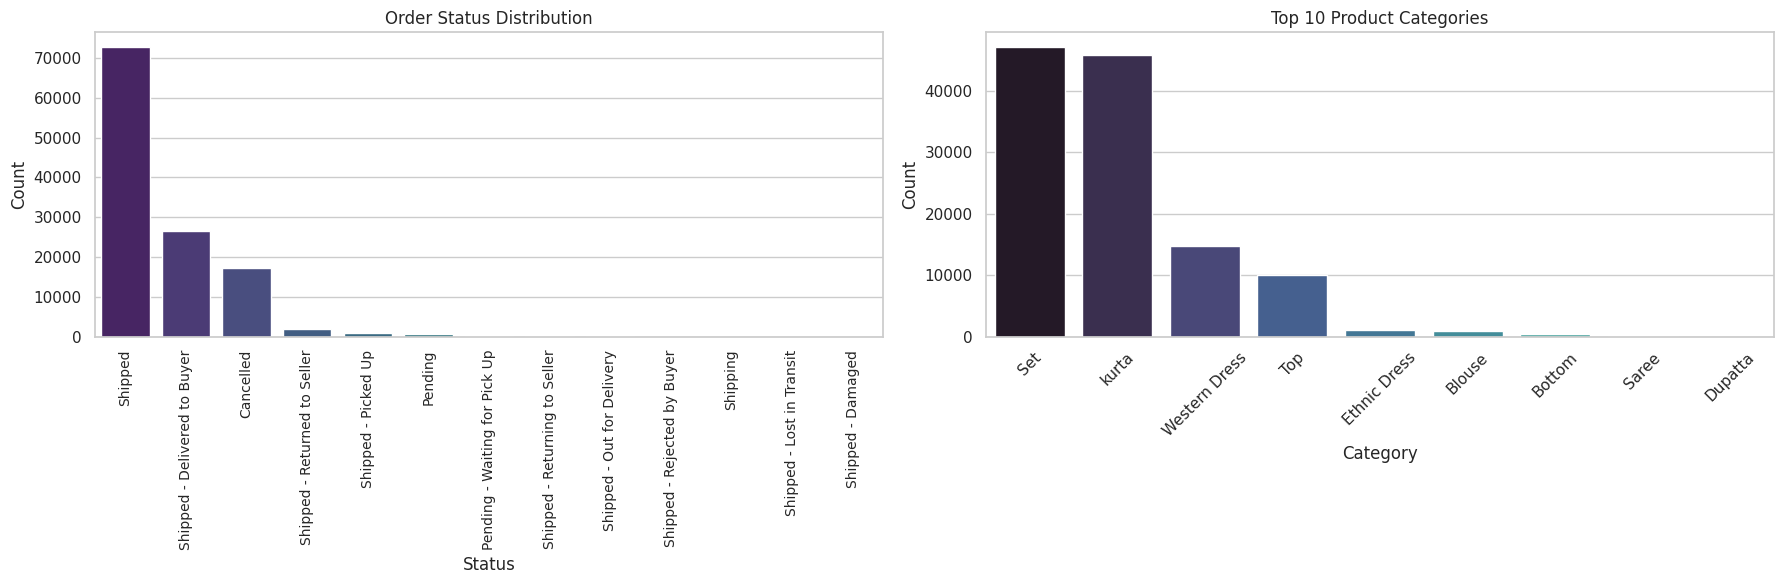

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Order Status Distribution
status_counts = df_cleaned['status'].value_counts()

# Top 10 Categories
top_categories = df_cleaned['category'].value_counts().head(10)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Order Status Plot (categorical on x-axis)
sns.barplot(x=status_counts.index, y=status_counts.values, ax=axes[0], palette='viridis')
axes[0].set_title('Order Status Distribution')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90,labelsize=10)

# Top Categories Plot (categorical on x-axis)
sns.barplot(x=top_categories.index, y=top_categories.values, ax=axes[1], palette='mako')
axes[1].set_title('Top 10 Product Categories')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [46]:
df_cleaned.to_csv("Amazon_Sales_Cleaned_Data.csv", index=False)